findfont: Font family ['fantasy'] not found. Falling back to DejaVu Sans.


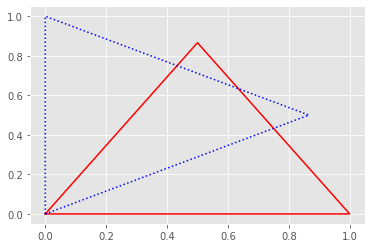

In [0]:
# Идентификация и конструирование заданного фрактала
import numpy as np
import pandas as pd
from numpy import linalg as LA
import random
import os
import fractalmodul

Размерность данных:  (1701, 2)


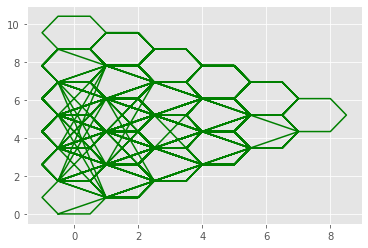

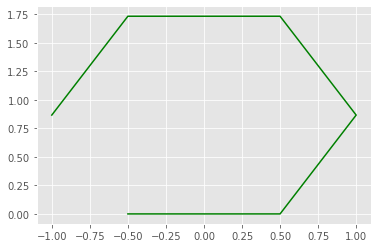

In [0]:
# ------ Загрузим точки заданного фрактала: --------
try:
    #data = pd.read_csv('var0.csv', encoding='cp1251', sep=';',header=None, index_col=0)
    data = pd.read_csv('var19.csv', encoding='cp1251', sep=';', header=None, dtype='float32', decimal=',')
    print("Размерность данных: ", data.shape)
    data.columns = ["x", "y"]
except:
    print("unable to read var_.csv")

# запомним данные в массиве numpy и транспонируем
data1 = np.array(data)
arrdata = np.array(data).T
# -------- выведем изображение фрактала ---------
import matplotlib.pyplot as plt
""" параметры графиков """
plt.style.use('ggplot')
plt.rcParams['font.fantasy'] = 'Arial', 'Times New Roman', 'Tahoma', 'Comic Sans MS', 'Courier'
plt.rcParams['font.family'] = 'fantasy'

fractalmodul.plot_fractal(arrdata, n= arrdata.shape[1])

# --------- проанализируем несколько первых точек и определим начальное множество ----------
fractalmodul.plot_fractal(arrdata, n=6)

# анализ нескольких первых точек поаказал, что в качестве начального множества точек выступает line0
Xset0 = fractalmodul.line0

In [0]:
# Тогда 1-м аффинным преобразованием является отображение иcходного отрезка (0;0)-(0;1) в отрезок "отросток" приблизительно (0; 0,33) - (-0,31; 0,86)
# Длина отрезка-отростка составляет:
AB = data1[1]-data1[0]
CD = data1[3]-data1[2]
L1 = LA.norm(AB)
L2 = LA.norm(CD)
print("длина стебля и 1-го отростка=", L1, L2)
# степень сжатия
k1 = L2/L1
# Угол между отростком и исходным отрезком - стеблем:
cosfi = np.dot(AB, CD)/L1/L2
fi1 = np.arccos(cosfi)
print("коэффициент сжатия и угол: ", k1, fi1*180/np.pi, "|cosfi=", cosfi)
# Найдем параметры 2-го аффинного преобразования -отображения иcходного отрезка (0;0)-(0;1) в отрезок "отросток" (0; 0,67) - (0,31; 1,2)
# Длина отрезка-отростка составляет:
EF = data1[5]-data1[4]
L3 = LA.norm(EF)
print("длина стебля и 2-го отростка=", L1, L3)
# степень сжатия
k2 = L3/L1

# Угол между отростком и исходным отрезком - стеблем:
cosfi = np.dot(AB, EF)/L1/L3
fi2 = np.arccos(cosfi)*np.sign(cosfi)
print("коэффициент сжатия и угол: ", k2, fi2*180/np.pi, "|cosfi=", cosfi)


длина стебля и 1-го отростка= 1.0 1.0
коэффициент сжатия и угол:  1.0 120.00000333930423 |cosfi= -0.5
длина стебля и 2-го отростка= 1.0 1.0
коэффициент сжатия и угол:  1.0 -120.00000333930423 |cosfi= -0.5


9.059412216801384

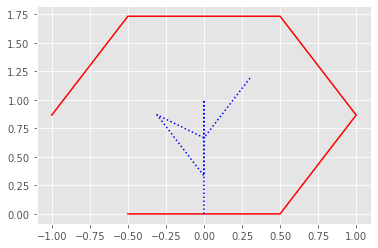

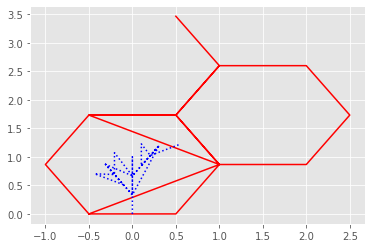

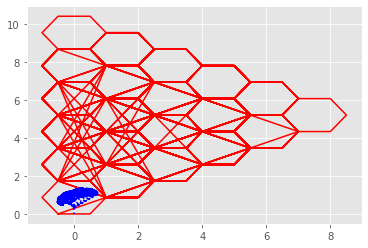

In [0]:
# анализ преобразования начального множества точек показал, что используется два преобразования
ATlist = [fractalmodul.ShiftRotateR(0.618, np.pi/6, 0, 1/3), fractalmodul.ShiftRotateR(0.618, -np.pi/6, 0, 2/3)]

# -------------- Конструируем фрактал с использованием начальных фигур и ССИФ: -------------
# посмотрим что получается с помощью одной итерации и совместим с начальной картинкой
Xset1 = fractalmodul.TSSIF(ATlist, Xset0)
fractalmodul.plot_fractal(arrdata, n=6, fcolor='red')
fractalmodul.add_plot_fractal(Xset1, fcolor='blue')

# посмотрим что получается с помощью второй итерации и совместим с начальной картинкой
Xset2 = fractalmodul.TSSIF(ATlist, Xset1)
fractalmodul.plot_fractal(arrdata, n=18, fcolor='red')
fractalmodul.add_plot_fractal(Xset2, fcolor='blue')

# а теперь посмотрим что получается с помощью многих итераций и совместим с начальной картинкой
niters = 7
Xset = Xset0
for i in range(niters):
    Xset = fractalmodul.TSSIF(ATlist, Xset)

fractalmodul.plot_fractal(arrdata, fcolor='red')
fractalmodul.add_plot_fractal(Xset, fcolor='blue')
# ----------- вычислим расстояние Хаусдорфа между множествами точек Set0, Set1 ------------
# здесь множество точек Set0,1 в виде np.array[[x0,x1,...], [y0, y1,...], ...].T
# т.е. строка Set0,1 - это координаты одной точки из множества
def Hdist1(Set0, Set1):
    dmax = 0
    for p in Set0:
        Set10 = Set1 - p
        Dvect = LA.norm(Set10, axis=1)
        minD = min(Dvect)
        if(dmax < minD): dmax = minD

    return dmax

def HausdorfDist(Set0, Set1):
    return max(Hdist1(Set0, Set1), Hdist1(Set1, Set0))

"""
проверка правильности вычисления рассточния Хаусдорфа
Set1 = np.array([[ 0,0], [0,1], [1,1], [1,0]])
Set0 = np.array([[ 0,0.5], [0,2], [0.5,0.5]])
Hdist1(Set0, Set1)
Hdist1(Set1, Set0)
HausdorfDist(Set0, Set1)
"""

# ----------- вычислим расстояние Хаусдорфа между множествами точек data, Xset ------------
HausdorfDist(np.array(data), Xset.T)

9.059412216801384